### BertTopic
* This code contains implementation of topic modeling (BERTopic) for public comments to CDC's Proposed Rule on Dog Importation. The comments can be found on **regulations.gov** (https://www.regulations.gov/document/CDC-2023-0051-0001).


In [0]:
%pip install bertopic==0.15

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
  Using cached hdbscan-0.8.38.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.2 MB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install gensim==4.3.2

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached gensim-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install spacy

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [0]:
%pip install nltk==3.9.1

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Not uninstalling nltk at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d1b7f943-a7b7-491c-9b21-1a40ee2126f3
    Can't uninstall 'nltk'. No files were found to uninstall.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install numpy==2.1

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached numpy-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Not uninstalling numpy at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d1b7f943-a7b7-491c-9b21-1a40ee2126f3
    Can't uninstall 'numpy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
petastorm 0.12.1 requires pyspark>=2.1.0, which is not installed.
databricks-feature-engineering 0.2.1 requires pyspark<4,>=3.1.2, which is not installed.
ydata-profiling 4.2.0 requires numpy<1.24,>=1.16.0, but you have numpy 2.1.0 which is incompatible.
tensorflow-cpu 2.14.1 requires numpy<2.0.0,>=1.23.5

In [0]:
# !!! Don't run this in Databricks - prevents code from working, requires restarting the cluster.
#dbutils.library.restartPython()

* [Example](https://maartengr.github.io/BERTopic/algorithm/algorithm.html#code-overview)
* [List of Supported Language Models](https://www.sbert.net/docs/pretrained_models.html)

In [0]:
from bertopic import BERTopic  # Topic modeling
from umap import UMAP  # Dimensionality reduction
from hdbscan import HDBSCAN  # Clustering
from sentence_transformers import SentenceTransformer  # Sentence embeddings
from sklearn.feature_extraction.text import CountVectorizer  # Text vectorization
from bertopic.representation import KeyBERTInspired  # KeyBERT representation
from bertopic.vectorizers import ClassTfidfTransformer  # Class-based TF-IDF
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations

import gensim.corpora as corpora  # Gensim corpora
from gensim.models.coherencemodel import CoherenceModel  # Topic coherence
from IPython.core.interactiveshell import InteractiveShell  # IPython shell
# InteractiveShell.ast_node_interactivity = "all"  # Show all outputs
pd.set_option('display.max_colwidth', None)  # Shows full text

import nltk  # Natural Language Toolkit
from nltk import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization
import nltk  # Natural Language Toolkit
nltk.download('stopwords')  # Download stopwords
nltk.download('punkt')  # Download punkt tokenizer
nltk.download('wordnet')  # Download wordnet
nltk.download('omw-1.4')  # Download wordnet data
import matplotlib.pyplot as plt  # Plotting
import re  # Regular expressions
import string  # String operations
import os  # Operating system interfaces
os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Disable parallelism for tokenizers
from transformers import pipeline  # Transformers pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TextClassificationPipeline  # Transformers for sequence classification
from pyspark.sql.functions import *  # Import all functions from pyspark.sql.functions

2024-08-29 14:24:02.607853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [0]:
np.random.seed(15)  # Set the random seed for NumPy to ensure reproducibility

#### 1 - Read the CSV from the WFSP volume "datafiles"

In [0]:
# Load the CSV file into a Spark DataFrame
df = spark.read.format('csv').options(  # Specify the format as CSV and set options
    header='true',  # First line of the file is a header
    inferSchema='true',  # Infer the schema of the CSV file
    multiline='true',  # Allow multiline fields
    escape="\""  # Escape character for quotes
).load("/Volumes/edav_dev_ddnid_niosh/wfsp/datafiles/dog_comments.csv")  # Load the CSV file from the specified path

# Display the DataFrame
display(df)  # Use display() to show the DataFrame

Document ID Agency ID Docket ID Tracking Number Document Type Posted Date Is Withdrawn? Federal Register Number FR Citation Title Comment Start Date Comment Due Date Allow Late Comments Comment on Document ID Effective Date Implementation Date Postmark Date Received Date Author Date Related RIN(s) Authors CFR Abstract Legacy ID Media Document Subtype Exhibit Location Exhibit Type Additional Field 1 Additional Field 2 Topics Duplicate Comments OMB/PRA Approval Number Page Count Page Length Paper Width Special Instructions Source Citation Start End Page Subject First Name Last Name City State/Province Zip/Postal Code Country Organization Name Submitter Representative Representative's Address Representative's City, State & Zip Government Agency Government Agency Type Comment Category Restrict Reason Type Restrict Reason Reason Withdrawn Content Files Attachment Files Display Properties (Name, Label, Tooltip) CDC-2023-0051-0001 CDC CDC-2023-0051 null Proposed Rule 2023-07-10T04:00Z false 2023-14343 88 FR 43978 Control of Communicable Diseases; Foreign Quarantine: Importation of Dogs and Cats 2023-07-10T04:00Z 2023-09-09T03:59:59Z false null null null null 2023-07-10T04:00Z null null null 42 CFR 71 null null null null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null https://downloads.regulations.gov/CDC-2023-0051-0001/content.pdf,https://downloads.regulations.gov/CDC-2023-0051-0001/content.htm null pageCount, Page Count, Number of pages In the content file CDC-2023-0051-0003 CDC CDC-2023-0051 ljx-f6u3-47ug Public Submission 2023-07-11T04:00Z false null null Comment from ., Jake null null false CDC-2023-0051-0001 null null null 2023-07-10T04:00Z null null null null null null null null null null null null null null null 1 null null null null null null Jake . null null null null null null null null null null Page 19 regarding this section, what are we supposed to do if we are already outside the United States with a US vaccinated dog and plan on coming back soon?

(2) The Certification of U.S.-issued
Rabies Vaccination for Live Dog Reentry into the United States form must
be completed prior to the dog leaving
the United States and cannot be
completed upon arrival at a U.S. port or
after the dog has left the United States

There is no way get this form now. If implemented when will this going into effect and will we be given a warning / grace period before this goes into effect? 

This new rule is way too strict and will make things too difficult for folks returning to the US with their US-vaccinate dog. For me for example if I have to go through the full foreign vaccinated dog requirements, my visa will expire before the 45 day titer requirement. What are we supposed to do then?? null null null null null null pageCount, Page Count, Number of pages In the content file CDC-2023-0051-0004 CDC CDC-2023-0051 ljy-2ev1-ntfo Public Submission 2023-07-11T04:00Z false null null Comment from Anonymous null null false CDC-2023-0051-0001 null null null 2023-07-11T04:00Z null null null null null null null null null null null null null null null 1 null null null null null null Anonymous Anonymous null null null null null null null null null null As an overseas federal contractor, this rule has a significant impact on me. I brought my dog overseas just before the original rule was imposed and was panicked about how to get my dog back home. Even having a US-valid rabies vaccine and paperwork, the rule was confusing for overseas veterinary staff and airlines, who originally refused to fly my dog to the US at all. Especially as flying from Africa to the US almost always requires transiting through Europe, now one must meet both requirements which do not necessarily align for rabies titers timelines. I saw a lot of dogs that were simply abandoned rather than wade through the murky and costly regulations, and other highly qualified people that opted not 

In [0]:
doc_all = df.toPandas()  # Convert Spark DataFrame to Pandas DataFrame
doc_all.columns = doc_all.columns.str.replace(' ', '_')  # Replace spaces with underscores in column names
doc_all.head(1)  # Display the first row of the DataFrame

Document_ID  ...                   Display_Properties_(Name,_Label,_Tooltip)
0  CDC-2023-0051-0001  ...  pageCount, Page Count, Number of pages In the content file

[1 rows x 60 columns]

#### 2- Basic Pre-Processing

In [0]:
df = doc_all[["Document_ID", "Comment"]]  # Select only the Document_ID and Comment columns from the DataFrame
df.shape  # Get the shape of the DataFrame

(2107, 2)

##### Basic Text Cleaning

In [0]:
def clean_text(text): #substitute some words
    text = text.lower()  # Convert text to lowercase
    text = re.sub("^\s+|\s+$", "", text, flags=re.UNICODE)  # Remove leading and trailing whitespace
    text = " ".join(re.split("\s+", text, flags=re.UNICODE))  # Replace multiple spaces with a single space
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    for r in (("covid-19","covid"), ("covid19","covid"), ("\n",""), ("&","and")):  # Replace specific substrings
        text = text.replace(*r)  # Apply replacements
    return text  # Return cleaned text

In [0]:
empty_comments = df[df['Comment'].isnull()] # In case there are empty comments
df = df.dropna(subset=['Comment']) # Drop na/empty comments
df.Comment = df.Comment.astype(str)  # Change to string
df.shape

(2106, 2)

In [0]:
df.loc[:, "Comment"] = df.loc[:, "Comment"].apply(clean_text) # Run function for each comment

In [0]:
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces in column names with underscores
display(df.head(2))  # Display the first 2 rows of the dataframe

Document_ID Comment CDC-2023-0051-0003 page 19 regarding this section, what are we supposed to do if we are already outside the united states with a us vaccinated dog and plan on coming back soon? (2) the certification of u.s.-issued rabies vaccination for live dog reentry into the united states form must be completed prior to the dog leaving the united states and cannot be completed upon arrival at a u.s. port or after the dog has left the united states there is no way get this form now. if implemented when will this going into effect and will we be given a warning / grace period before this goes into effect? this new rule is way too strict and will make things too difficult for folks returning to the us with their us-vaccinate dog. for me for example if i have to go through the full foreign vaccinated dog requirements, my visa will expire before the 45 day titer requirement. what are we supposed to do then?? CDC-2023-0051-0004 as an overseas federal contractor, this rule has a significant impact on me. i brought my dog overseas just before the original rule was imposed and was panicked about how to get my dog back home. even having a us-valid rabies vaccine and paperwork, the rule was confusing for overseas veterinary staff and airlines, who originally refused to fly my dog to the us at all. especially as flying from africa to the us almost always requires transiting through europe, now one must meet both requirements which do not necessarily align for rabies titers timelines. i saw a lot of dogs that were simply abandoned rather than wade through the murky and costly regulations, and other highly qualified people that opted not to move to a rabies-high risk country due to the burden it would impose upon returning to the united states. especially for high burden and high risk countries where there is a constant risk of evacuation or mandated departure, the regulations impose a significant stress and burden for families trying to move overseas for work and bring their family pets along. please consider stringent regulations for rescues and commercial importers while taking into consideration the effects for overseas employees and family pets, as well as the burden and bad optics that large numbers of abandoned dogs by us expatriates places on local underfunded pet rescue organizations.

##### Create DF with duplicate comments

In [0]:
# False = marks every single duplicate
duplic_comments = df.loc[df['Comment'].duplicated(keep = False), :].sort_values('Comment', ascending=False)  # Find all duplicates and sort by Comment in descending order
duplic_comments.shape  # Get the shape of the dataframe containing duplicates

(814, 2)

In [0]:
# Keep only first of the duplicates in df  # Drop duplicates based on 'Comment' column, keeping the first occurrence
# Note that I keep first duplicated to inform topic modeling but then will place all duplicates in a sep group  # Reset index and drop the old index column
df = df.drop_duplicates(subset = "Comment", keep="first").reset_index().drop(columns = 'index')  # Get the shape of the dataframe after dropping duplicates
df.shape  # Display the shape of the dataframe

(1335, 2)

In [0]:
duplicated_ids = duplic_comments["Document_ID"].to_list()  # Convert Document_ID column to a list of duplicated IDs
def check_duplicate(value):  # Define a function to check if a value is in the list of duplicated IDs
    return value in duplicated_ids  # Return True if the value is in the list, otherwise False

In [0]:
df['Is_Duplicated'] = df['Document_ID'].apply(lambda x: check_duplicate(x))  # Marks first duplicate as true in a list of unique docs
df.head(2)

Document_ID  ... Is_Duplicated
0  CDC-2023-0051-0003  ...         False
1  CDC-2023-0051-0004  ...         False

[2 rows x 3 columns]

In [0]:
df[df['Is_Duplicated'] == True].shape  # Counts N of unique messages that are duplicates will be used in TM

(43, 3)

#### 3- Prepare Specifications for BERTopic

In [0]:
docs = df.Comment.values.tolist()  # Convert 'Comment' column to list
ids = df.Document_ID.values.tolist()  # Convert 'Document_ID' column to list
is_duplicated = df.Is_Duplicated.values.tolist()  # Convert 'Is_Duplicated' column to list
len(docs)  # Get the length of the 'docs' list

1335

In [0]:
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2") 

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.5, metric='cosine', random_state=42)

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='leaf', prediction_data=True, min_samples=5) 

# Step 4 - Tokenize topics and lemmatize terms (this will happen after clustering)
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        doc = re.sub(r'[^\w\d\s\']+', ' ', doc)  # Remove non-alphanumeric characters
        doc = re.sub('`', ' ', doc)  # Replace backticks with space
        doc = re.sub('\'', ' ', doc)  # Replace single quotes with space
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]  # Lemmatize tokens
    
stopwords = nltk.corpus.stopwords.words('english')  # Stopwords are used after clustering
newStopWords = ['cdc', 'rabies', 'vaccination', 'vaccine', 'regulation',
                'vaccinated', 'canine', 'dog', 'importation', 'pet', 'cat',
                'proposed', 'require', 'requirement', 'policy', 'importation',
                'imported', 'rule', 'importing', 'u',
                'law', 'animal', 'ruling', 'wa', 'across', 'already',
                'proposal', 'nprm', 'pas', 'dont', 'v', 'thus',
                'non', 'ha', 'would', 'need', 'others', 'ever', 'doe', 'many', 'united', 'state',
                '1' , '3', '2', '6', 'may', 'one', 'must', 'well', 'please',
                'thing', 'like', 'attached', 'moron', 'anyone', 'also',
                'every', 'without', 'way', 'via', 'really', 'able', '16', 'everyone',
                'sense', 'alright', 'redctaoecalliw', 'fetsko', 'beyond']
stopwords.extend(newStopWords)  # Extend stopwords list with new stopwords
vectorizer_model = CountVectorizer(lowercase=True, stop_words=stopwords, tokenizer=LemmaTokenizer(),  
                                   ngram_range=(1, 1))  # Initialize CountVectorizer with custom tokenizer and stopwords

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()  # Initialize ClassTfidfTransformer

#### 4- Run Multiple Topic Solutions Simultaneously

* Note that the outliers cluster (labeled as "-1") seems to be in each topic solution. Thus, if you want to start with an actual 2 topic solution in addition to 'outliers' cluster', you need to specify 3-topic solution as a starting point.

In [0]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [0]:
# NOTE: This step takes approximately 2 hours to run (with 1 cluster worker; 4 hours with 2 workers).

all_models = []

for n in range(3,32):  # Range of 3,32 gives 2 to 30 topic solutions plus a cluster with outliers
    topic_model = BERTopic(nr_topics=n,
                        embedding_model = embedding_model,        # Step 1 - Extract embeddings
                        umap_model=umap_model,                    # Step 2 - Reduce dimensionality
                        hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
                        vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
                        ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
                        calculate_probabilities=True,             # Calculate probabilities for doc in top
                        top_n_words=20,                           # Shows top N words in the outputs
                        min_topic_size=10
                        )                                         # Specify min size of docs in the cluster
    topics, probs = topic_model.fit_transform(docs)  # Fits the model & predicts documents
    new_topics = topic_model.reduce_outliers(docs, topics, probabilities=probs, strategy="embeddings")  # Reduce outliers using embeddings strategy
    topic_model.update_topics(docs, topics=new_topics, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model, top_n_words = 20)  # Update topics with new topics and models
    d = {
        "n_topics":n,  # Number of topics
        "model": topic_model,  # Topic model
        "topics":topics,  # Topics
        "doc_ids":ids,  # Document IDs
        "probs":probs,  # Probabilities
        "is_duplicated":is_duplicated  # Is duplicated flag
    }

    all_models.append(d)  # Append dictionary to all_models list

#### 5- Calculate Topic Coherence

To calculate topic coherence, you need the following inputs:

* **dictionary**: gives unique ID to each lemmatized token; universal accross different model i.e., not model-specific.

* **corpus**: **list of lists of tuples** of (token_id, token_count for a given topic); counts lemmatized tokens accross all documents **in each topic**. Converts each document into the bag-of-words (BoW) format and produces tuples for each topic. For instance, a token with id 0 may appear in each topic and will be shown in multiples tuples in different lists as (0, 4); (0;18); (0;25) if observed 4;8;25 times in each topic respectively.

* **texts**: **list of lists** where each list incorporates all (not unique but lemmatized) tokens for each topic; needed for coherence models that use sliding window based probability estimator; varies for each model solution.

* **topics**: **list of lists of unique lemmatized top tokens** for each topic; note that these are taken from BERTopic from the list of most representative tokens for each topic; if you want to have more tokens as inputs for coherence calculation, you need to increase the parameter *top_n_words* in Bertopic function. This input will vary for each model solution. Note the **substraction of 1**; it has been done to drop representative words for topic labeled as '-1' as it conceptually does not represent a topic and it is an outlier group of documents & their respective words.

* **coherence**: type of coherence such as: 'c_v'; 'u_mass','c_uci', 'c_npmi'. See link to the paper below for more details about each coherence measure. C_V seems like a promising measure due to its correlation with human annotations (see original paper below of topic coherences by Roder)

**Other Notes**: 

* General intuition: topics input is checked against *dictionary* and *corpus*.
* Note that *vectorizer* is used directly from bertopic model to create dictionary; corpus, tokens
* Coherence is a proxy for a topic model's performance; it is not a ground truth. It is important to look at the topics and see if they make sense.

[Link to code sources to calculate coherence, suggested by BERTopic developer](https://github.com/MaartenGr/BERTopic/issues/90)

[Link to paper that explains different types of coherences](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf)


In [0]:
for i, d in enumerate(all_models):
    topic_model = d["model"]  # Extract topic model from dictionary
    topics = d["topics"]  # Extract topics from dictionary
    documents = pd.DataFrame({"Comment": docs,  # Create DataFrame with comments, IDs, and topics
                          "ID": ids,
                          "Topic": topics})  # Create DataFrame with comments, IDs, and topics

    # All docs combined into its relevant topic; e.g., 19 long documents for 19-topic model
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Comment': ' '.join})

    # List of clean docs; length of 19 items/topics in the list
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Comment.values)  # Some basic preprocessing suggested before next steps

    # Extract vectorizer and analyzer from BERTopic; we want to make sure tokens are counted consistently
    vectorizer = topic_model.vectorizer_model  # Counts token (also removes stopwords & lemmatizes tokens)
    analyzer = vectorizer.build_analyzer()  # Handles tokenization below & allows for n-gram tokenization

    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()  # Gives a list of all unique words in the whole df in alphabetical order
    tokens = [analyzer(doc) for doc in cleaned_docs]  # List of lists; each list consists of all tokens in one big document representing the whole topic; note that tokens are not unique but they are lemmatized & stopwords are removed.

    dictionary = corpora.Dictionary(tokens)  # Initialize a dictionary to map assign pre-defined dictionary IDs to lemmatized words; input parameter for coherence function

    # Converts document into the bag-of-words (BoW) format = list of `(token_id, token_count for a given topic)`
    corpus = [dictionary.doc2bow(token) for token in tokens]  # For each non-unique but lemmatized token in each of the lists, assign ID to the token; uses token ID instead of actual token in the output; input parameter for coherence function

    # List of lists of unique (lemmatized) top tokens for each topic
    topic_words = [[words for words, _ in topic_model.get_topic(topic) if words != ''] 
                for topic in range(len(set(topics))-1)] 

    coherence_model = CoherenceModel(topics=topic_words,  # Lists of unique lemmatized (top) tokens for each topic
                                    texts=tokens,         # Non-unique lemmatized tokens for each topic w stopwords removed
                                    corpus=corpus,        # Token counts per topic
                                    dictionary=dictionary, # Tokens with uniquely assigned ids
                                    coherence='c_v')    # Coherence methods: u_mass', 'c_v', 'c_uci', 'c_npmi'
    topic_coherence = coherence_model.get_coherence()  # Calculate coherence score
    d["topic_words"] = topic_words  # Add topic words to dictionary
    d["coherence"] = topic_coherence  # Add coherence score to dictionary
    all_models[i] = d  # Update all_models list with new dictionary

#### 6 - Plot Coherence for Various Topic Models

In [0]:
topic_n = []  # Initialize list to store number of topics
coherence_scores = []  # Initialize list to store coherence scores

for d in all_models:
    topic = d["n_topics"] - 1  # Note how subtraction happens here to understand real N of groups
    coherence = d["coherence"]  # Extract coherence score

    coherence_scores.append(coherence)  # Append coherence score to list
    topic_n.append(topic)  # Append number of topics to list

In [0]:
display(pd.DataFrame({"Topic Numbers": topic_n}))  # Display topic numbers
display(pd.DataFrame({"Coherence Scores": coherence_scores}))  # Display coherence scores

Topic Numbers 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

Coherence Scores 0.36398371500594456 0.4712975122693021 0.5410535536796125 0.47890936006086166 0.49196711407228816 0.4902915046847725 0.48260547140837207 0.5106338232420864 0.48720496730787655 0.5196835516214203 0.522982987642412 0.5651133849756338 0.5790589248111677 0.5892548200230967 0.6159939750488668 0.6215313552267665 0.6273065654103941 0.633505749242715 0.6331558862375455 0.6504339385166718 0.655326613875277 0.6591585777905299 0.6704473141117546 0.6797718113447719 0.689115152609362 0.689115152609362 0.689115152609362 0.689115152609362 0.689115152609362

* **Topic Numbers**:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
* **Coherence scores**:  [0.42835981430669084, 0.5479967800312345, 0.5312118732366322, 0.5048783170896309, 0.4828228554518336, 0.523723389939143, 0.5566293402138496, 0.5072398952396904, 0.5005136295502279, 0.5017410452823039, 0.5236306980315419, 0.5327356961613613, 0.5398281915435353, 0.5846900772396316, 0.5658251519740275, 0.5760427845679531, 0.6126386121968124, 0.6094663583063834, 0.6133618697216052, 0.6151266297639923, 0.6175306017128454, 0.6185121276944673, 0.631107973988079, 0.6288146537939842, 0.6358173778850508, 0.6450746550961226, 0.6557408295501457, 0.6652393753347353, 0.6728607376755679]

Text(0, 0.5, 'Score')

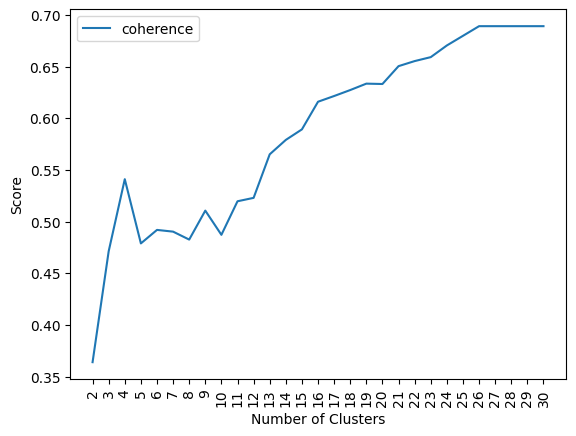

In [0]:
import builtins
import numpy as np
import matplotlib.pyplot as plt

plt.plot(topic_n, coherence_scores)  # Plot coherence scores against number of topics
plt.legend(['coherence'])  # Add legend to the plot
plt.xticks(np.arange(builtins.min(topic_n), builtins.max(topic_n) + 1))  # Set x-ticks from min to max number of topics
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.xlabel('Number of Clusters')  # Label x-axis
plt.ylabel('Score')  # Label y-axis

#### 7- Human Judgement Steps: Check Vaious Models of Interest
##### 7a - Visual Exploration of Model(s) of Interest: Plots of Most Representative Words

First, you can check most representative words for each topic solution.
* need to channge numerical value in **get_model** function when creating variable **interest_model_info**
* note that you may need to adjust **top_n_topics=50** to see a higher number of topics if needed
* note that the N of topics returned in the barchart will include **n-1** topics (e.g., 9 instead of 10) as it drops the topic with outliers

In [0]:
def get_model(all_models, n_topics):
    for model in all_models:  # Iterate through all models
        if model["n_topics"] == n_topics:  # Check if the number of topics matches
            return model  # Return the matching model

In [0]:
interest_model_info = get_model(all_models, 16)  # Select model of interest with a N serving as a topic solution
# Note that I need to add +1 compared to plot values as there is an empty cluster with outliers

In [0]:
interest_model_info["model"].visualize_barchart(n_words=40, width = 250, height = 1200, top_n_topics=45)  # Visualize the top 45 topics with a bar chart, showing 40 words per topic, with specified width and height

In [0]:
# interest_model_info["model"].get_topic_freq()  # Get the frequency of each topic in the model

##### 7b- Hierarchical Clustering Dendogram

In [0]:
interest_model_info["model"].visualize_hierarchy(custom_labels=True)  # Visualize the topic hierarchy with custom labels

#### 8 - Create Final DF
* add duplicates to the topic modeling file

In [0]:
# Start creating final df
all_docs_allCols = interest_model_info["model"].get_document_info(docs)  # With mix of all docs per cluster
rel_cols = all_docs_allCols[["Document", "Topic", "Probability"]]  # Select relevant columns
rel_cols["ID"] = df["Document_ID"].values  # Add Document_ID column
rel_cols["Is_Duplicated"] = df["Is_Duplicated"].values  # Add Is_Duplicated column

In [0]:
all_docs_allCols.shape  # Get the shape of the DataFrame

(1335, 8)

In [0]:
sorted_df = rel_cols.groupby('Topic').apply(lambda x: x.sort_values('Probability', ascending=False))  # Group by 'Topic' and sort within each group by 'Probability' in descending order
sorted_df.reset_index(drop=True, inplace=True)  # Reset index and drop the old index
sorted_df[sorted_df['Topic']== 0].head(10)  # Filter for 'Topic' equal to 0 and display the first 10 rows

Document  ...  Is_Duplicated
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         i support the cdc's proposed rule on dog importation in particular, the proposed requirement for permanent identification, a six-month age minimum for imported puppies, incorporating greater veterinary oversight, and requiring verification of documentation prior to transport are essential provisions in the proposed rule that will reduce the risks associated with dog importation.  ...          False
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    thank you for the opportunity to comment on cdc’s proposed rule updating federal dog importation requirements. i am writing in support of cdc’s proposed rule which would add much needed safeguards to protect animals and the public from the introduction of rabies via imported dogs. in particular, the proposed requirement for permanent identification, a six-month age minimum for imported puppies, incorporating greater veterinary oversight, and requiring verification of documentation prior to transport are essential provisions in the proposed rule that will reduce the risks associated with dog importation.  ...          False
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    thank you for the opportunity to comment on cdc’s prop

In [0]:
sorted_df = sorted_df.rename(columns={'Topic': 'cluster'})  # Rename 'Topic' column to 'cluster'
sorted_df.shape  # Get the shape of the DataFrame

(1335, 5)

In [0]:
# Bring back variables of interest to original document
sorted_df = sorted_df.drop(['Document'], axis=1)  # Optional
df_merged = pd.merge(doc_all, sorted_df, how='left', left_on=['Document_ID'], right_on=['ID'])  # Merge doc_all with sorted_df on Document_ID and ID

In [0]:
df_merged.loc[df_merged['Is_Duplicated'].isna(), 'Is_Duplicated'] = True  # Add True for 'Is_Duplicated' where it is NaN

In [0]:
# Add variable for date being after August 25 (per customer's request)
df_merged['FormattedDate'] = pd.to_datetime(df_merged['Posted_Date'])  # Convert 'Posted_Date' to datetime
df_merged['FormattedDate'] = df_merged['FormattedDate'].dt.strftime('%Y-%m-%d')  # Format datetime to 'YYYY-MM-DD'
df_merged['FormattedDate'] = pd.to_datetime(df_merged['FormattedDate'])  # Convert formatted date back to datetime
specific_date = pd.to_datetime('2023-08-26')  # Define the specific date
df_merged['AfterAug25'] = df_merged['FormattedDate'].apply(lambda x: 'Before' if x < specific_date else 'After')  # Apply condition to check if date is before or after specific date
df_merged.head(2)  # Display the first 2 rows of the dataframe

Document_ID Agency_ID  ... FormattedDate AfterAug25
0  CDC-2023-0051-0001       CDC  ...    2023-07-10     Before
1  CDC-2023-0051-0003       CDC  ...    2023-07-11     Before

[2 rows x 66 columns]

#### 9 - Change Some Spark Settings for Saving 

In [0]:
import pyspark.sql.functions as F  # Import functions from pyspark.sql
from pyspark.sql.types import NullType  # Import NullType from pyspark.sql.types
from pyspark.sql.types import ArrayType  # Import ArrayType from pyspark.sql.types

df2 = spark.createDataFrame(df_merged)  # Create a Spark DataFrame from df_merged

df3 = df2.select([
    F.lit(None).cast('string').alias(i.name)  # Cast NullType columns to string and alias with column name
    if isinstance(i.dataType, NullType)  # Check if column data type is NullType
    else i.name  # Otherwise, keep the column name as is
    for i in df2.schema  # Iterate over the schema of df2
])

In [0]:
arr_col = [  # List of array columns
    i.name  # Column name
    for i in df3.schema  # Iterate over the schema of df3
    if isinstance(i.dataType, ArrayType)  # Check if column data type is ArrayType
]

final_df  = df3.select([  # Select columns from df3
    F.concat_ws(',', c)  # Concatenate array elements with comma
    if c in arr_col  # If column is in array columns
    else F.col(c)  # Otherwise, select the column as is
    for c in df3.columns  # Iterate over columns of df3
])

Output the final dataframe to the WFSP volume "datafiles"

In [0]:
#final_df.write.csv('/Volumes/edav_dev_ddnid_niosh/wfsp/datafiles/comments_rev1_ND.csv', 
#    header=True, 
 #   mode='overwrite'
#)

final_df.coalesce(1).write.csv('/Volumes/edav_dev_ddnid_niosh/wfsp/datafiles/comments_rev1_ND2.csv', 
    header=True, 
    mode='overwrite'
)

#display(final_df)